# Simple AutoEncoder

In [6]:
from tensorflow import keras

### Load and Normalization of data

In [7]:
(x_train,_),(x_test,_) = keras.datasets.mnist.load_data()
# normalize
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 33s 3us/step


* The `encoder` is a sequential neural network with $28 \times 28$ input neurons, $100$ neurons in the second layer and $30$ in the third. The third layer is called the "bottleneck". Feel free to play around with this variable to see how it affects results.

In [9]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(30,activation='relu')
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* The decoder is the same, but in opposite order. Note that keras needs to know the input shape at this point. The input shape of the decoder is the shape of $z$, also called `zDim` as you will see later on.

In [12]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [13]:
stacked_autoencoder = keras.models.Sequential([encoder,decoder])

* Note that we use binary cross entropy loss in stead of categorical cross entropy. The reason for that is because we are not classifying latent vectors to belong to a particular class, we do not even have classes!, but rather are trying to predict whether a pixel should be activated or not.

In [14]:
# compilr the model

stacked_autoencoder.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

In [15]:
# training the model
history = stacked_autoencoder.fit(
    x_train,x_train,
    epochs=10,
    validation_data=[x_test,x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.1986 - val_loss: 0.1067
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1056 - val_loss: 0.0994
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0991 - val_loss: 0.0952
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0959 - val_loss: 0.0933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0939 - val_loss: 0.0915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0921 - val_loss: 0.0898
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0905 - val_loss: 0.0888
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0894 - val_loss: 0.0880
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0888 - val_loss: 0.0876
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0880 - val_loss: 0.0871


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


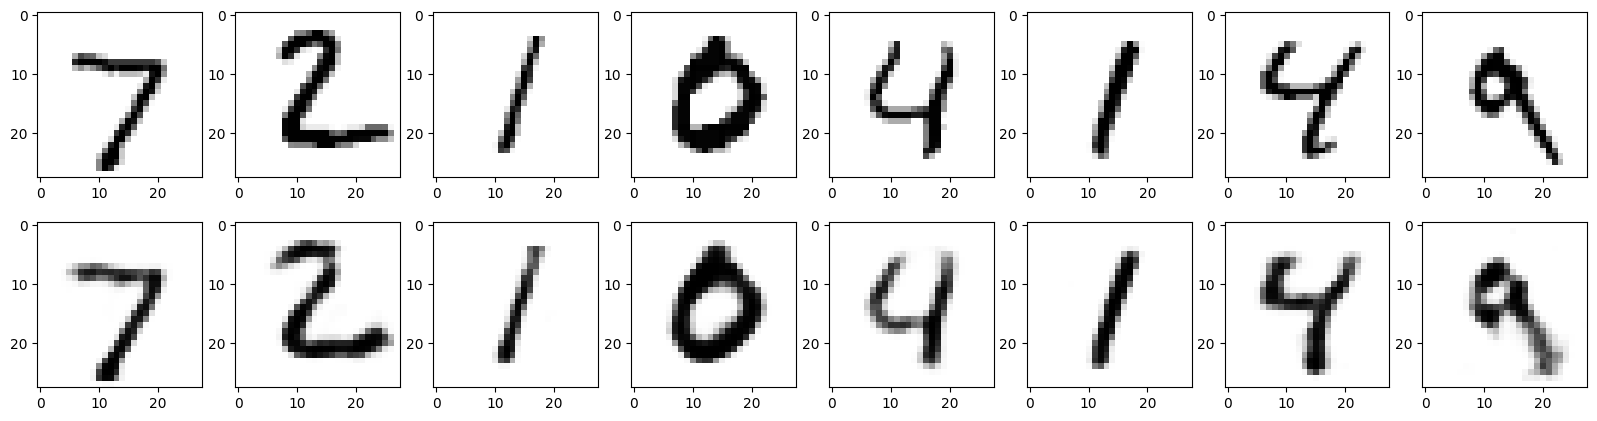

In [19]:
# autoencoder reconstruct the image

figsize(20,5)
for i in range(8):
    subplot(2,8,i+1)
    # prediction on current test image
    pred = stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
    # display original image
    imshow(x_test[i],cmap='binary')
    subplot(2,8,i+8+1)
    # display reconstructed image
    imshow(pred.reshape((28,28)),cmap='binary')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


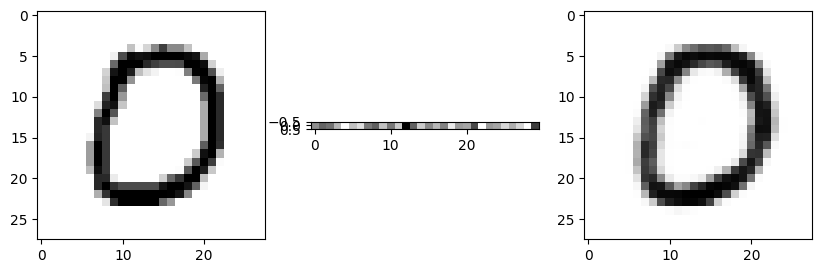

In [29]:
# for specific vector
i = 10
figsize(10,5)
# show original image
subplot(1,3,1)
imshow(x_test[i],cmap='binary')

# latent vector
subplot(1,3,2)
latent_vector = encoder.predict(x_test[i].reshape((1,28,28)))
imshow(latent_vector,cmap='binary')

# reconstructed image
subplot(1,3,3)
pred = decoder.predict(latent_vector)
imshow(pred.reshape(28,28),cmap='binary')

In [33]:
sparsity_low = 30/(28*28)
sparsity_high = 1 - 30/(28*28)
print(sparsity_low,sparsity_high)
# 96% is compressed in original data

0.03826530612244898 0.9617346938775511


## Convolutional autoencoder

Apart from data compression, autoencoders can also be used for self-supervised image classification.

The first layers of the encoder learn to recognize patterns in the data very well in order to compress the data. If you don't have access to much labelled data, but a lot of unlabelled data, it's possible to train an autoencoder and copy the first layers from the autoencoder to the classifier network. This can be compared to transfer learning, where you only have to train the head afterwards.

It is well known that convolutional layers are perfect for finding patterns in data, so it's good to know they can also be used in autoencoders. To "de-convolve" images in the decoder, transposed convolutional layers are used. For more information on transposed convolutional layers, checkout [this blog post](https://rickwierenga.com/blog/s4tf/s4tf-gan.html) I have written which explains them in more detail. See the last section "Autoencoders and GANs" of this notebook for more information on the beautiful relation between GANs and autoencoders.

In [35]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1],input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2)
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
encoder.predict(x_test[0].reshape(1,28,28)).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


(1, 3, 3, 64)

In [37]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32,kernel_size=(3,3),strides=2,activation='relu',padding='valid',input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16,kernel_size=(3,3),strides=2,activation='relu',padding='same'),
    keras.layers.Conv2DTranspose(1,kernel_size=(3,3),strides=2,padding='same',activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [38]:
stacked_autoencoder = keras.models.Sequential([encoder,decoder])

In [39]:
# compilr the model

stacked_autoencoder.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

In [40]:
# training the model
history = stacked_autoencoder.fit(
    x_train,x_train,
    epochs=10,
    validation_data=[x_test,x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - loss: 0.1938 - val_loss: 0.0835
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0823 - val_loss: 0.0782
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0774 - val_loss: 0.0750
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0752 - val_loss: 0.0736
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0738 - val_loss: 0.0724
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 0.0726 - val_loss: 0.0713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0716 - val_loss: 0.0707
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 0.0712 - val_loss: 0.0700
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0706 - val_loss: 0.0696
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0700 - val_loss: 0.0690


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


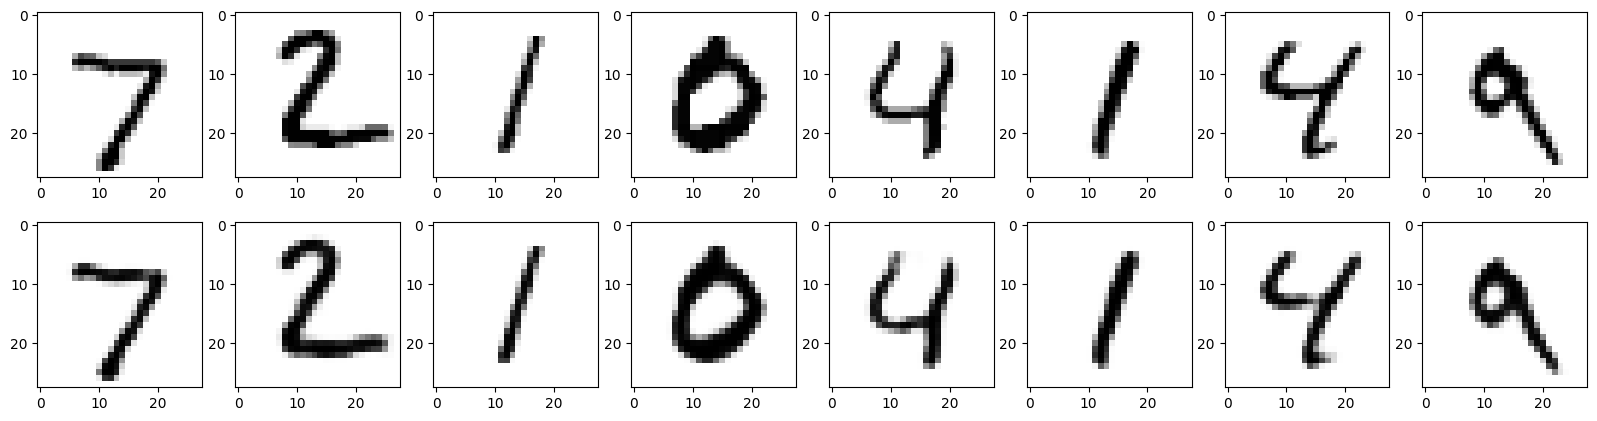

In [43]:
# autoencoder reconstruct the image

figsize(20,5)
for i in range(8):
    subplot(2,8,i+1)
    # prediction on current test image
    pred = stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
    # display original image
    imshow(x_test[i],cmap='binary')
    subplot(2,8,i+8+1)
    # display reconstructed image
    imshow(pred.reshape((28,28)),cmap='binary')

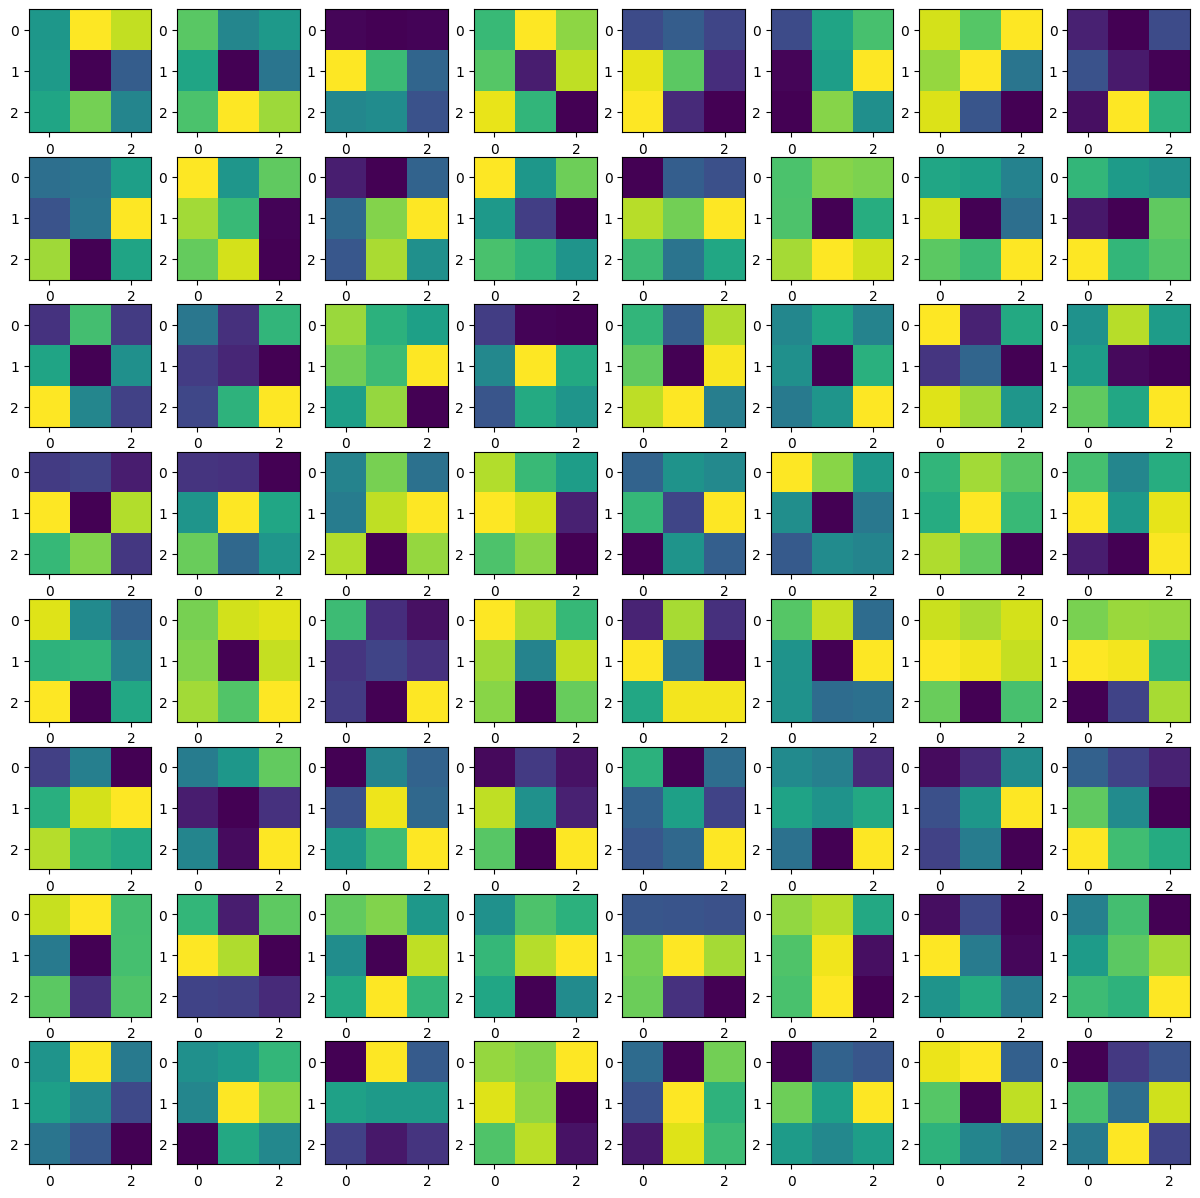

In [47]:
 figsize(15,15)
for i in range(8*8):
    subplot(8,8,i+1)
    imshow(encoder.layers[-2].weights[0][:,:,0,i])

Visually not very pleasing, but proven to be effective as shown in the previous figure.

$3 \times 3 \times 64=576$ is still less than $28 \times 28 = 784$, thus creating a bottleneck, but much less compressed than the dense encoder making convolutional encoders less suitable for comporession. But thanks to their convolutional layers, they are great to use in cases where you want your autoencoder to find visual patterns in your data.

# Denoising Autoencoder

In [48]:
import numpy as np

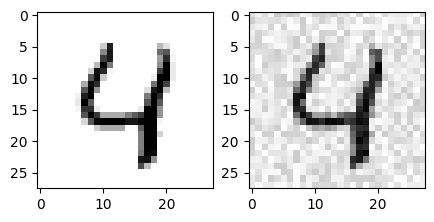

In [50]:
figsize(5,10)
subplot(1,2,1)
imshow(x_test[4],cmap='binary')

subplot(1,2,2)
noise = np.random.random((28,28))/4
imshow(x_test[4]+noise,cmap='binary')

In [51]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
stacked_autoencoder = keras.models.Sequential([encoder,decoder])

In [54]:
# compilr the model

stacked_autoencoder.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

In [55]:
x_train_noise = x_train + ((np.random.random(x_train.shape))/4)
x_test_noise = x_test + ((np.random.random(x_test.shape))/4)

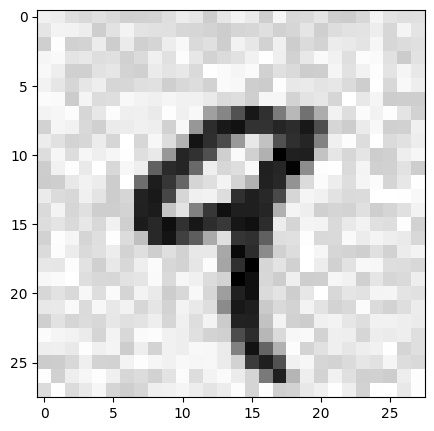

In [56]:
imshow(x_train_noise[4],cmap='binary')

In [63]:
# training the model
history = stacked_autoencoder.fit(
    x_train_noise,x_train,
    epochs=10,
    validation_data=[x_test_noise,x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0971 - val_loss: 0.0898
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0901 - val_loss: 0.0890
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0895 - val_loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0890 - val_loss: 0.0883
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0887 - val_loss: 0.0876
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0885 - val_loss: 0.0875
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0882 - val_loss: 0.0884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0882 - val_loss: 0.0879
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0879 - val_loss: 0.0872
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0878 - val_loss: 0.0870


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


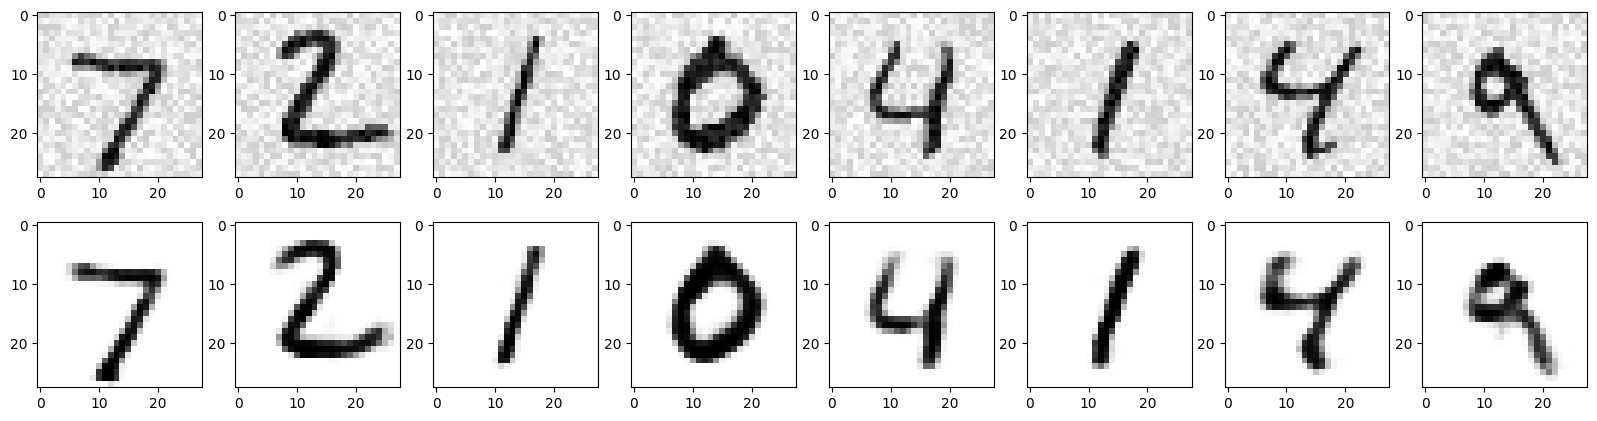

In [64]:
# autoencoder reconstruct the image

figsize(20,5)
for i in range(8):
    subplot(2,8,i+1)
    # display original image
    imshow(x_test_noise[i],cmap='binary')
    subplot(2,8,i+8+1)
    pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1,28,28)))
    # display reconstructed image
    imshow(pred.reshape((28,28)),cmap='binary')